<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/unit_3_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

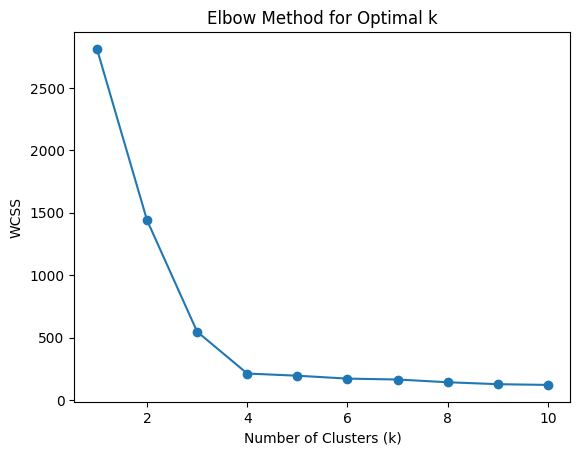

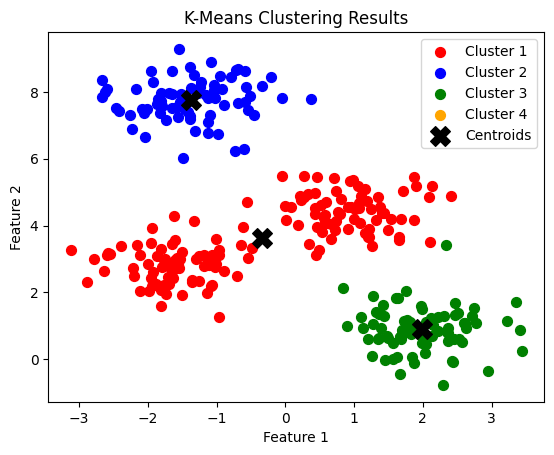

In [3]:
# K-Means Clustering with Elbow Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Step 1: Generate sample data (300 points, 4 centers)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
# Step 2: Elbow Method to find optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 3: Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Step 4: Apply K-Means with the chosen k (from the elbow, say k=4)
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Step 5: Visualize the Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='orange', label='Cluster 4')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [6]:
# Implementing all clustering distance/similarity measures
import numpy as np
from sklearn.metrics import jaccard_score

# Define two points
point1 = np.array([2, 3])
point2 = np.array([5, 7])
# 1. Euclidean Distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

euclidean = euclidean_distance(point1, point2)
print(f"Euclidean Distance: {euclidean:.4f}")

# 2. Manhattan Distance
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

manhattan = manhattan_distance(point1, point2)
print(f"Manhattan Distance: {manhattan:.4f}")

# 3. Cosine Similarity
def cosine_similarity(p1, p2):
    dot_product = np.dot(p1, p2)
    norm1 = np.linalg.norm(p1)
    norm2 = np.linalg.norm(p2)
    return dot_product / (norm1 * norm2)

cosine = cosine_similarity(point1, point2)
print(f"Cosine Similarity: {cosine:.4f}")

# 4. Minkowski Distance (generalized form)
def minkowski_distance(p1, p2, p):
    return np.power(np.sum(np.abs(p1 - p2) ** p), 1/p)

p_value = 3
minkowski = minkowski_distance(point1, point2, p_value)
print(f"Minkowski Distance (p={p_value}): {minkowski:.4f}")

# 5. Jaccard Index (Similarity)
vector1 = np.array([1, 1, 0, 0])
vector2 = np.array([1, 1, 1, 0])

jaccard = jaccard_score(vector1, vector2)
print(f"Jaccard Index (Similarity): {jaccard:.4f}")

print(" - Smaller distance = more similar (Euclidean, Manhattan, Minkowski)")
print(" - Larger similarity = more similar (Cosine, Jaccard)")


Euclidean Distance: 5.0000
Manhattan Distance: 7.0000
Cosine Similarity: 0.9995
Minkowski Distance (p=3): 4.4979
Jaccard Index (Similarity): 0.6667
 - Smaller distance = more similar (Euclidean, Manhattan, Minkowski)
 - Larger similarity = more similar (Cosine, Jaccard)


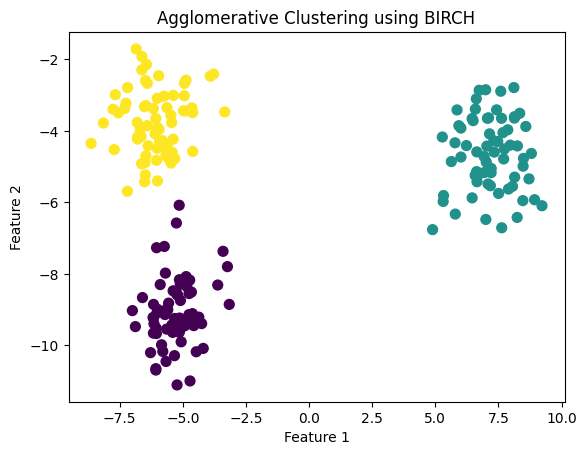

In [10]:
# Agglomerative Hierarchical Clustering using BIRCH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

# Step 1: Generate synthetic dataset
X, y = make_blobs(n_samples=200, centers=3)

# Step 2: Initialize and fit BIRCH model
birch = Birch(n_clusters=3)
birch.fit(X)
labels = birch.labels_

# Step 3: Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering using BIRCH")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


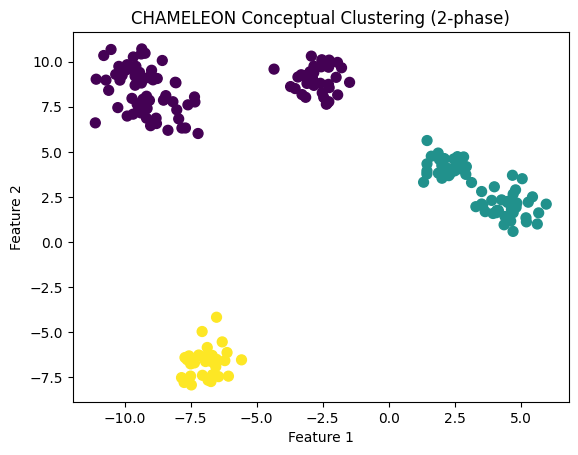

In [12]:
# Agglomerative Hierarchical Clustering using CHAMELEON concept
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering

# Step 1: Create data
X, y = make_blobs(n_samples=200, centers=6, random_state=42, cluster_std=0.7)

# Step 2: Phase 1 – Graph partitioning (sub-clusters)
# Here we use KMeans to create small sub-clusters
sub_clusters = KMeans(n_clusters=10, random_state=42)
sub_labels = sub_clusters.fit_predict(X)

# Step 3: Phase 2 – Merge similar sub-clusters (Agglomerative)
agg = AgglomerativeClustering(n_clusters=3)
final_labels = agg.fit_predict(sub_clusters.cluster_centers_)

# Assign final cluster labels to original points
# Each point inherits the final label of its sub-cluster center
mapping = {i: final_labels[i] for i in range(len(final_labels))}
labels = np.array([mapping[sub_label] for sub_label in sub_labels])

# Step 4: Plot final clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("CHAMELEON Conceptual Clustering (2-phase)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


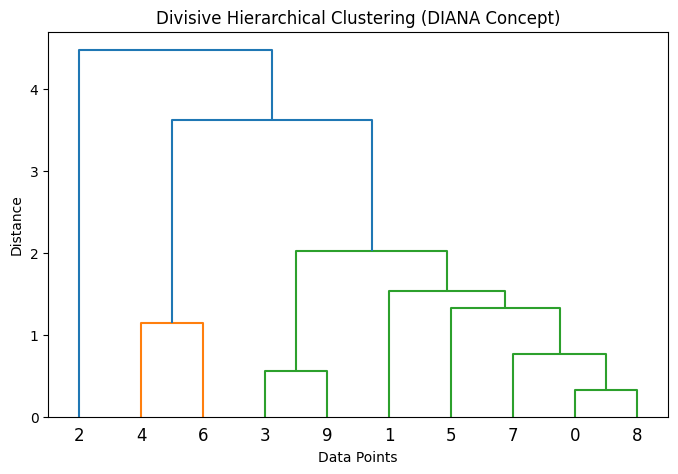

Cluster Labels: [2 2 3 2 1 2 1 2 2 2]


In [13]:
# Divisive Hierarchical Clustering (DIANA)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 1: Generate dataset
X, y = make_blobs(n_samples=10, centers=1, random_state=0)

# Step 2: Compute linkage using 'ward' (used for divisive visualization)
Z = linkage(X, method='ward')

# Step 3: Plot dendrogram (visualize hierarchical splits)
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Divisive Hierarchical Clustering (DIANA Concept)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Step 4: (Optional) Create flat clusters by cutting the dendrogram
labels = fcluster(Z, t=3, criterion='maxclust')
print("Cluster Labels:", labels)
